In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import scipy.integrate
import scipy.special

In [2]:
# Input parameters
rho = 0.01
sigma = 0.5
sigma_tilde = sigma/((1-(1-rho)**2)**0.5)
print(sigma_tilde)

3.544406025041677


In [3]:
def expd_tau(lmbd, _rho, _sigma): 
    #expected input: lmbd -- list of length 2, lmbd[0]<=lmbd[1], _rho, _sigma -- positive scalar parameters    
    result = scipy.integrate.quad(lambda x: math.exp((x**2)*_rho/(_sigma**2))*(1+scipy.special.erf(x*(_rho**0.5)/_sigma)), lmbd[0], lmbd[1])
    return result[0]*(np.pi**0.5)/(_sigma*(_rho**0.5))

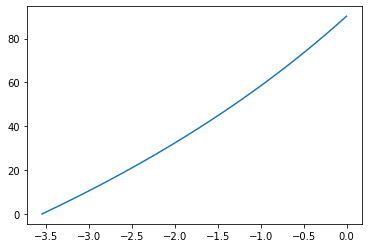

In [4]:
#compute expected return time to lambda2, starting from lambda1<lambda2 
lambda1 = -sigma_tilde
lambda2 = [lambda1 + i*sigma_tilde/1000 for i in range(1000)]
Etau = []
for i in range(len(lambda2)):
    Etau.append(expd_tau([lambda1,lambda2[i]],rho,sigma))
plt.plot(lambda2,Etau)

In [6]:
# maximization of the risk-return objective
P = 40 #price of the asset on the long side of the pair
c = P*4*0.005 #T-cost of opening and closing the pair
lambda1 = -3*sigma_tilde/2 #current position, at which the pair is now
#gamma = 0.00005 #reciprocal of risk tolerance
T = 30 #upper limit on the holding time
#obj = lambda lam: -(lam-lambda1-c)/P + gamma*(expd_tau([lambda1,lam],rho,sigma))**2
obj = lambda lam: -(lam-lambda1-c)*(T-expd_tau([lambda1,lam],rho,sigma))/P
cons = ({'type': 'ineq', 'fun': lambda lmbd: lmbd-lambda1-c}) # inequality means that it is to be non-negative
lmbd0 = lambda1/2
opt = scipy.optimize.minimize(obj,lmbd0,constraints=cons) 
print(opt)
print(lambda1)
print((opt.x[0]-lambda1-c)/P)
print(expd_tau([lambda1,opt.x[0]],rho,sigma))
print(-obj(opt.x[0]))

-2.6583045187812577
     fun: -0.11741653482901467
     jac: array([6.00088388e-05])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([-3.99621241])
-5.3166090375625155
0.013009915768113172
20.974842810527775
0.11741653482901467
